## Main Objective
The goal of this project is to design a robust machine learning pipeline that:

1. **Classifies individuals** into predefined credit score categories (e.g., Bad, Standard, Good) based on financial and behavioral features.
2. **Predicts the exact credit score value** to provide a more granular and personalized analysis.

### Data Understanding
1. **ID**: Represents the unique identity of an entry.
2. **Customer_ID**: Represents the unique identity of a person.
3. **Month**: Represents the month of the year.
4. **Name**: Represents a person's name.
5. **Age**: Represents the person's age.
6. **SSN**: Represents the person's Social Security Number.
7. **Occupation**: Represents the person's occupation.
8. **Annual_Income**: Represents the person's annual income.
9. **Monthly_Inhand_Salary**: Represents the person's monthly net salary.
10. **Num_Bank_Accounts**: Represents the number of bank accounts the person has.
11. **Num_Credit_Card**: Represents the number of additional credit cards the person has.
12. **Interest_Rate**: Represents the credit card interest rate.
13. **Num_of_Loan**: Represents the number of loans taken from the bank.
14. **Type_of_Loan**: Represents the types of loans the person has taken.
15. **Delay_from_due_date**: Represents the average number of days delayed from the due date of payment.
16. **Num_of_Delayed_Payment**: Represents the number of delayed payments the person has made.
17. **Changed_Credit_Limit**: Represents the percentage change in the credit card limit.
18. **Num_Credit_Inquiries**: Represents the number of credit card inquiries.
19. **Credit_Mix**: Represents the classification of the credit mix.
20. **Outstanding_Debt**: Represents the remaining outstanding debt (in USD).
21. **Credit_Utilization_Ratio**: Represents the credit card utilization ratio.
22. **Credit_History_Age**: Represents the age of the person's credit history.
23. **Payment_of_Min_Amount**: Represents whether the person only pays the minimum amount due.
24. **Total_EMI_per_month**: Represents the monthly EMI payments (in USD).
25. **Amount_invested_monthly**: Represents the amount invested by the customer monthly (in USD).
26. **Payment_Behaviour**: Represents the customer's payment behavior.
27. **Monthly_Balance**: Represents the customer's monthly balance amount (in USD).
28. **Credit_Score**: Represents the credit score range (Bad, Standard, Good).

The dataset can be found at: [https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data]

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("datasets/credit_scoring/train.csv", dtype={'Monthly_Balance': 'str'})

In [5]:
dataset.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.94496,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
dataset.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

### Dealing With Null Values

In [8]:
dataset_cpy = dataset.copy()

##### 'Name' feature
> Removing this column/feature as it doesn't provide any value for our task!

In [9]:
# The 'Name' column. It doesn’t seem to provide any direct predictive value for tasks like credit score classification or prediction, as names are not correlated with financial behavior or creditworthiness.
dataset_cpy = dataset_cpy.drop(columns=['Name'], axis=1)

##### 'Monthly_Inhand_Salary' feature
> The value for each user is constant therefore we can impute the missing values for each user by filling them with the first non-null value available for that user!

In [10]:
# The 'Monthly_Inhand_Salary' for a user is constant, we can impute the missing values for each user by filling them with the first non-null value available for that user.
dataset_cpy['Monthly_Inhand_Salary'] = dataset_cpy.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(
    lambda x: x.ffill().bfill()
)
# Combined, ffill().bfill() ensures all missing values in a group are filled using valid values from both directions. (Both forward and backward filling.)

##### 'Type_of_Loan' feature
> The 'Type_of_Loan' values for each user is constant therefore we can impute the missing values for each user by filling them with the first non-null value available for that user!

In [ ]:
# The 'Type_of_Loan' for a user is constant, we can impute the missing values for each user by filling them with the first non-null value available for the user.
dataset_cpy['Type_of_Loan'] = dataset_cpy.groupby('Customer_ID')['Type_of_Loan'].transform(
    lambda x: x.ffill().bfill().astype(str)
)
# Combined, ffill().bfill() ensures all missing values in a group are filled using valid values from both directions.
# .infer_objects() to ensure the result has the proper dtype inference (e.g., converting object arrays back to strings)

##### 'Num_Credit_Inquiries' feature
> The 'Num_Credit_Inquiries' values for each user is constant therefore we can impute the missing values for each user by filling them with the first non-null value available for that user!

In [12]:
# The 'Num_Credit_Inquiries' for a user is constant, we cn impute the missing value for each user by filling them with the first non-null value available for the user.
dataset_cpy['Num_Credit_Inquiries'] = dataset_cpy.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(
    lambda x: x.ffill().bfill()
)

##### 'Credit_History_Age' feature
> By default the format of this feature is "22 Years and 1 Months"!  
We first convert this feature to number months by multiplying the number of years with 12 and adding the month.  
For dealing with NaN values, as the months increases by one, we fill the NaN values of a user by either increasing the previous month or decreasing the following month of the user. The choice is based on the location of NaN value!

In [13]:
# For counting the number of months of user's credit history.
def convert_to_months(value):
    if pd.isnull(value):  # Check if the value is NaN
        return 0  
    years, months = map(int, value.replace('Years', '').replace('Months', '').split('and'))
    return years * 12 + months

In [14]:
dataset_cpy['Credit_History_Age'] = dataset_cpy['Credit_History_Age'].apply(convert_to_months)

In [15]:
def fix_credit_history_age(dataset):
    # Group dataset by Customer_ID
    grouped = dataset.groupby('Customer_ID')
    
    # Iterate through each user group
    for user_id, group in grouped:
        # Get the indices for the group
        indices = group.index
        
        # Fix the first row if its value is 0
        if dataset.loc[indices[0], 'Credit_History_Age'] == 0:
            dataset.loc[indices[0], 'Credit_History_Age'] = dataset.loc[indices[1], 'Credit_History_Age'] - 1
        
        # Set the first row's value as the starting value
        start_value = dataset.loc[indices[0], 'Credit_History_Age']
        
        # Loop through the 8 rows for the user and increment the value by 1
        for i in range(8):
            dataset.loc[indices[i], 'Credit_History_Age'] = start_value + i
            
    return dataset

In [16]:
# Apply the function to each user group
dataset_cpy = fix_credit_history_age(dataset=dataset_cpy)

##### 'Amount_invested_monthly' feature
> After converting the feature from string to numeric one. We fill the NaN or missing values of a user with the mean or average monthly invested value of the user!

In [17]:
# Replacing non-standard numeric strings with NaN
dataset_cpy['Amount_invested_monthly'] = dataset_cpy['Amount_invested_monthly'].str.replace(r'[^\d\.]', '', regex=True)

In [18]:
# Convert the string values to numeric 
# Any value that can't be converted will automatically became NaN when "errors='coerce'" is specificed!
dataset_cpy['Amount_invested_monthly'] = pd.to_numeric(dataset_cpy['Amount_invested_monthly'], errors='coerce')

In [19]:
def fill_nan_in_batches(column, batch_size = 8):
    # batch_size = 8 because each user has 8 rows in the dataset.
    # converting column to a numpy array for easier manipulaton
    values = column.values

    # Looping through that data in batches 
    for i in range(0, len(values), batch_size):
        batch = values[i:i+batch_size] # Extract the batch
        mean_value = np.nanmean(batch) # calculating the mean

        # Filling NaN values with the calculating mean for this batch
        batch[np.isnan(batch)] = mean_value

        # Replace the original value with the processed batch
        values[i:i+batch_size] = batch
    
    # Returning the updated column as a Pandas series
    return pd.Series(values, index=column.index)

In [20]:
# We fill the 'NaN' values of this feature with the average value of each user.
# Batch user of 8 because each user has 8 rows.
dataset_cpy['Amount_invested_monthly'] = fill_nan_in_batches(dataset_cpy['Amount_invested_monthly'], batch_size=8)

##### 'Monthly_Balance' feature
> After converting the feature from string to numeric one. We fill the NaN or missing values of a user with the mean or average monthly balanced value of the user!

In [21]:
# Replacing non-standard numeric strings with NaN
dataset_cpy['Monthly_Balance'] = dataset_cpy['Monthly_Balance'].str.replace(r'[^\d\.]', '', regex=True)
# Convert the String values to Numeric. Having errors='coerce' makes all the values that can't get converted to NaN
dataset_cpy['Monthly_Balance'] = pd.to_numeric(dataset_cpy['Monthly_Balance'], errors='coerce')

In [22]:
# Filling the NaN values with the average Monthly balance value for each user.
# Batch user of 8 because each user has 8 rows.
dataset_cpy['Monthly_Balance'] = fill_nan_in_batches(dataset_cpy['Monthly_Balance'], batch_size=8)

##### 'Num_of_Delayed_Payment' feature
> Filling the missing value of each with its average number of delayed payments.

In [23]:
# Remove unwanted characters and convert to numeric, invalid parsing becomes NaN
dataset_cpy['Num_of_Delayed_Payment'] = dataset_cpy['Num_of_Delayed_Payment'].str.replace(r'[^\d]', '', regex=True)
dataset_cpy['Num_of_Delayed_Payment'] = pd.to_numeric(dataset_cpy['Num_of_Delayed_Payment'], errors='coerce')

In [24]:
# Filling the NaN values with the average value, each user has 8 rows.
dataset_cpy['Num_of_Delayed_Payment'] = fill_nan_in_batches(dataset_cpy['Num_of_Delayed_Payment'], batch_size=8)

In [25]:
dataset_cpy.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### Data Preprocessing
##### 'Age' feature

In [26]:
# Replacing non-standard values with NaN
dataset_cpy['Age'] = dataset_cpy['Age'].str.replace(r'[^\d]', '', regex=True)
# Converting from string values to numeric! errors='coerce' makes those values that can't be converted become NaN.
dataset_cpy['Age'] = pd.to_numeric(dataset_cpy['Age'], errors='coerce')

In [27]:
# Defining a realistic age range
valid_age_range = (0, 120)
# Replacing Outliers or Non-realistic age values with NaN
dataset_cpy['Age'] = dataset_cpy['Age'].apply(
    lambda x: x if valid_age_range[0] <= x <= valid_age_range[1] else np.nan
)

In [28]:
# Dealing with NaN values.
dataset_cpy['Age'] = dataset_cpy.groupby('Customer_ID')['Age'].transform(
    lambda x: x.ffill().bfill()
)

##### 'Annual_Income' feature

In [29]:
# Replacing non-standard values with NaN
dataset_cpy['Annual_Income'] = dataset_cpy['Annual_Income'].str.replace(r'[^\d]', '', regex=True)
# Converting string values to the numeric!
dataset_cpy['Annual_Income'] = pd.to_numeric(dataset_cpy['Annual_Income'], errors='coerce')

##### 'Num_of_Loan' feature

In [30]:
# Replacing non-standard values with NaN
dataset_cpy['Num_of_Loan'] = dataset_cpy['Num_of_Loan'].str.replace(r'[^\d]', '', regex=True)
# Converting string values to the numeric! errors='coerce' automatically sets the values that can't get converted to NaN!
dataset_cpy['Num_of_Loan'] = pd.to_numeric(dataset_cpy['Num_of_Loan'], errors='coerce')

In [31]:
# Replacing outliers with group mode
def enforce_column_consistency(column, batch_size=8):
    # a temporary group identifier
    group_ids = column.index // batch_size
    consistent_column = column.groupby(group_ids).transform(
        lambda x: x.mode()[0]
    )
    return consistent_column

In [32]:
dataset_cpy['Num_of_Loan'] = enforce_column_consistency(column=dataset_cpy['Num_of_Loan'], batch_size=8)

##### 'Changed_Credit_Limit' feature

In [33]:
# Replacing non-standard values with NaN
dataset_cpy['Changed_Credit_Limit'] = dataset_cpy['Changed_Credit_Limit'].str.replace(r'[^\d]', '', regex=True)
# Converting string values to the numeric ones.
dataset_cpy['Changed_Credit_Limit'] = pd.to_numeric(dataset_cpy['Changed_Credit_Limit'], errors='coerce')

In [34]:
# Filling the NaN values of a user with its monthly credit card limit change.
dataset_cpy['Changed_Credit_Limit'] = fill_nan_in_batches(column=dataset_cpy['Changed_Credit_Limit'], batch_size=8)

##### 'Outstanding_Debt' feature

In [35]:
# Replacing non-standard values with NaN!
dataset_cpy['Outstanding_Debt'] = dataset_cpy['Outstanding_Debt'].str.replace(r'[^\d]', '', regex=True)
# Converting string values to numeric ones!
dataset_cpy['Outstanding_Debt'] = pd.to_numeric(dataset_cpy['Outstanding_Debt'], errors='coerce')

### Feature Selection
#### Enforcing column consistency for consistent features

In [36]:
constant_numerical_features = ['Customer_ID', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 
                               'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month', 'Credit_Mix', 'Payment_of_Min_Amount']
for feature in constant_numerical_features:
    dataset_cpy[feature] = enforce_column_consistency(column=dataset_cpy[feature], batch_size=8)

#### Taking mean of varying numerical features

In [37]:
aggregated_varying_data = dataset_cpy.groupby('Customer_ID').agg({
    'Delay_from_due_date': 'mean',
    'Num_of_Delayed_Payment': 'mean',
    'Changed_Credit_Limit': 'mean',
    'Credit_Utilization_Ratio': 'mean',
    'Credit_History_Age': 'mean',
    'Amount_invested_monthly': 'mean',
    'Monthly_Balance': 'mean'
}).reset_index()

#### Encoding the target feature

In [38]:
# Encoding Credit_Score
dataset_cpy['Credit_Score_Encoded'] = dataset_cpy['Credit_Score'].map({'Good': 3, 'Standard': 2, 'Poor': 1})

In [39]:
# Aggregating mean values per user
aggregated_credit_data = dataset_cpy.groupby('Customer_ID')['Credit_Score_Encoded'].mean().reset_index()

In [40]:
aggregated_credit_data.head()

,Customer_ID,Credit_Score_Encoded
0,CUS_0x1000,1.125
1,CUS_0x1009,2.000
2,CUS_0x100b,1.375
3,CUS_0x1011,2.000
4,CUS_0x1013,2.000


In [41]:
aggregated_varying_data.head(1)

,Customer_ID,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance
0,CUS_0x1000,62.25,25.0,188.0,33.477546,125.5,158.549735,335.375341


In [42]:
def classify_credit_score(mean_score):
    if mean_score <= 1.5:
        return 'Poor'
    elif mean_score <= 2.5:
        return 'Standard'
    else:
        return 'Good'

In [43]:
aggregated_credit_data['Final_Credit_Score'] = aggregated_credit_data['Credit_Score_Encoded'].apply(classify_credit_score)

In [44]:
aggregated_credit_data.head()

,Customer_ID,Credit_Score_Encoded,Final_Credit_Score
0,CUS_0x1000,1.125,Poor
1,CUS_0x1009,2.000,Standard
2,CUS_0x100b,1.375,Poor
3,CUS_0x1011,2.000,Standard
4,CUS_0x1013,2.000,Standard


#### The final dataset for the task
> In this task, we opted to work with an aggregated dataset. By averaging varying numerical features like 'Monthly_Spend,' we ensure the dataset is clear and easier to handle. However, one drawback of this approach is that aggregating the varying features results in the loss of temporal information. Since each user has 8 rows in the dataset, representing data from January to August, aggregation removes detailed insights into trends or shifts over time.

In [45]:
aggregated_constant_data = dataset_cpy[constant_numerical_features]

In [46]:
temp_merged = pd.merge(aggregated_varying_data, aggregated_credit_data, on='Customer_ID', how='inner')

In [47]:
unique_ones = aggregated_constant_data.groupby('Customer_ID').first().reset_index()

In [48]:
final_dataset = pd.merge(unique_ones, temp_merged, on='Customer_ID', how='inner')

In [49]:
final_dataset.head(1)

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Payment_of_Min_Amount,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Credit_Score_Encoded,Final_Credit_Score
0,CUS_0x1000,17.0,Lawyer,3062594,2706.161667,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",...,Yes,62.25,25.0,188.0,33.477546,125.5,158.549735,335.375341,1.125,Poor


### Exploratory Data Analysis
#### What are the distributions of key financial variables (Annual_Income, Monthly_Inhand_Salary, Outstanding_Debt, and Monthly_Balance)?
##### Annual_Income

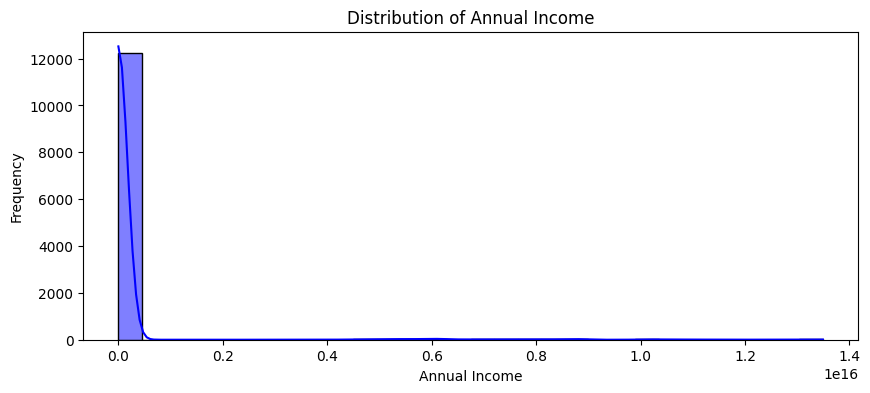

In [56]:
# Annual_Income
plt.figure(figsize=(10, 4))
sns.histplot(final_dataset['Annual_Income'], kde=True, bins=30, color='blue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

> There are customer with unrealistic 'Annual_Income' like 11378138999999998, which could be due to wrong data entry. We decide to discard these rows from the dataset!

In [57]:
Q1 = final_dataset['Annual_Income'].quantile(0.25)
Q2 = final_dataset['Annual_Income'].quantile(0.75)
IQR = Q2 - Q1

# Outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q2 + 1.5 * IQR

# Filtering out outliers
filtered_dataset = final_dataset[(final_dataset['Annual_Income'] >= lower_bound) &
                                 (final_dataset['Annual_Income'] <= upper_bound)]

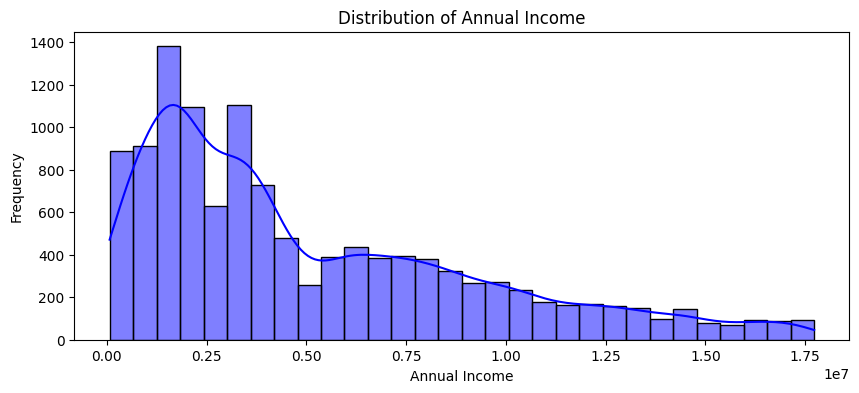

In [61]:
# Annual_Income
plt.figure(figsize=(10, 4))
sns.histplot(filtered_dataset['Annual_Income'], kde=True, bins=30, color='blue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

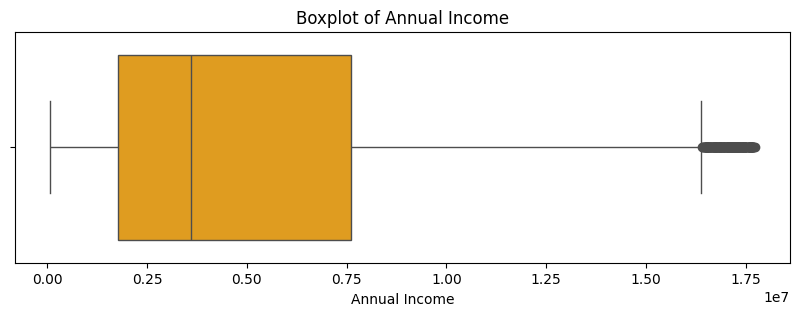

In [69]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=filtered_dataset['Annual_Income'], color='orange')
plt.title('Boxplot of Annual Income')
plt.xlabel('Annual Income')
plt.show()

> **Q1** =  About 25% of the Annual_Income values are below 20% (0.20 in scaled terms). This indicates the lower boundary of "typical" income levels!  
**Q2** = aligns closely with the median value of the feature. This means half of the data lies below approximately 30% on the scaled x-axis!  
**Q3** = suggests that 75% of the data is below 75% (scaled). This is where higher incomes become more frequent within the dataset!  
**Outliers** Observations significantly higher than Q3 (beyond the "whiskers" of the boxplot) represent the extreme income values, which include those around 17.7 million. These outliers extend far beyond the main bulk of data.

##### Monthly_Inhand_Salary

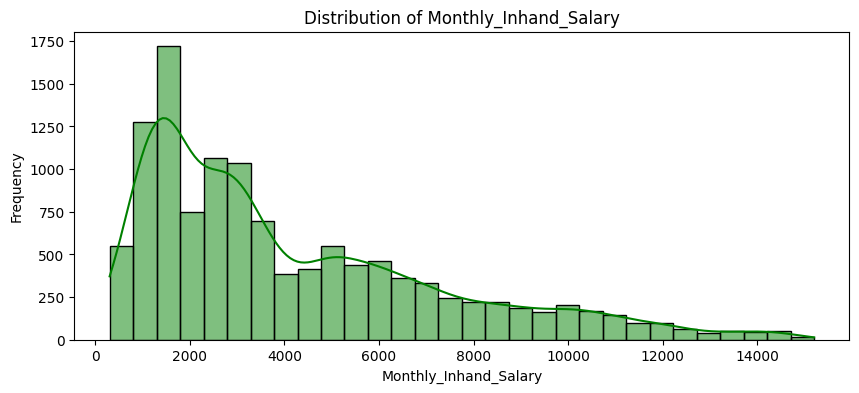

In [72]:
plt.figure(figsize=(10, 4))
sns.histplot(x=filtered_dataset['Monthly_Inhand_Salary'], kde=True, bins=30, color='green')
plt.title('Distribution of Monthly_Inhand_Salary')
plt.xlabel('Monthly_Inhand_Salary')
plt.ylabel('Frequency')
plt.show()

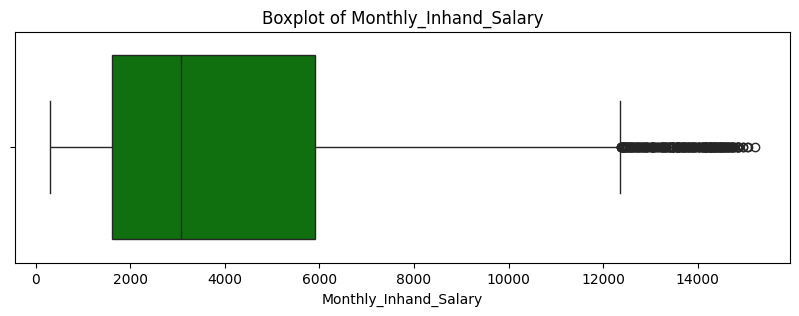

In [73]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=filtered_dataset['Monthly_Inhand_Salary'], color='green')
plt.title('Boxplot of Monthly_Inhand_Salary')
plt.xlabel('Monthly_Inhand_Salary')
plt.show()

> The first quartile (Q1) is approximately $1,800, suggesting that 25% of the individuals earn less than this amount. The median (Q2) of $3,000 represents the central tendency, showing that half of the individuals earn $3,000 or less. The third quartile (Q3) of $6,000 highlights that 75% of the data lies below this value, with the upper 25% comprising higher earners. Outliers, ranging from $12,200 to $16,000, represent individuals with significantly higher in-hand salaries that deviate from the typical pattern.

##### Outstanding_Debt